In [1]:
import pandas as pd
import numpy as np
import random as rd
from scipy.signal import lfilter
import matplotlib
from matplotlib import pyplot as plt

In [2]:
#Time Series
n = 10000
n_samples = np.linspace(0,n-1,n) 

s_data = np.random.uniform(-0.9, 0.9, n) #uniform noise with 10000 samples
s_data = np.arctanh(white_noise) #desired time serie with nonlinearity
x_input = lfilter([1, 0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0.5], 1, s_data) #filtered input time serie (sistema hammerstein)


NameError: name 'np' is not defined

In [1]:
#White Noise Plot 
fig = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], white_noise[0:99], color='black')
plt.xlabel('n')
plt.ylabel('w(n)')

plt.grid()
plt.show()

NameError: name 'plt' is not defined

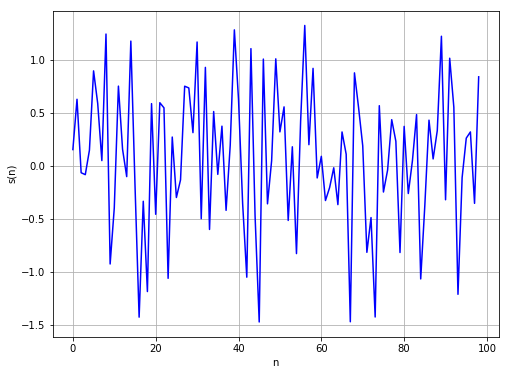

In [4]:
#Desired Time Serie Plot (Time Serie With Non Linearity)
fig2 = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], s_data[0:99], color='blue')
plt.xlabel('n')
plt.ylabel('s(n)')

plt.grid()
plt.show()

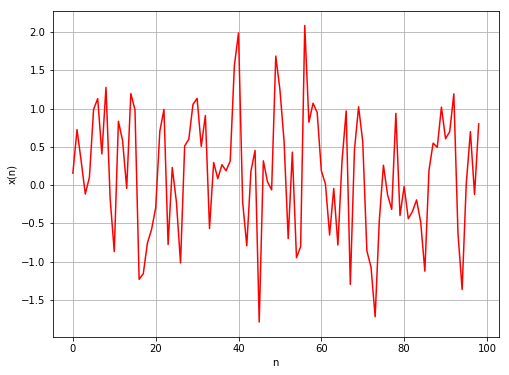

In [7]:
#Input Time Serie Plot (Filtered Time Serie - Hammerstein)
fig3 = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], x_input[0:99], color='red')
plt.xlabel('n')
plt.ylabel('x(n)')

plt.grid()
plt.show()

In [ ]:
def perceptron_tanh(x_input, s_data, bias, lr):
    
    wind = 3
    winx = 2
    xm = np.zeros(winx)
    
    x_data = np.append(xm, x_input) 
    
    w = np.zeros(wind)
    w_temp = np.append(bias, w) #dim = 4
   
    y_out = []
   
    #for k in range (0, len(x_input)-1):
    for k in range (0, len(x_input)):
        
        w = w_temp #dim = 4
        
        x_temp = x_data[k:wind+k] #dim = 3
        x_temp2 = x_temp[::-1] #reverse x_temp
        x_temp3 = np.append(1, x_temp2) #dim = 4
        
        #y_temp is the dot product between w_temp and x_temp
        y_temp = np.tanh(np.dot(w,x_temp3))
        y_out.append(y_temp)
       
        if y_temp == s_data[k]:
            w_out = w
        else:
            w_out = w - lr*(s_data[k] - y_temp)*x_temp3
    
        w_temp = w_out
        
    return w_out, y_out

In [9]:
def perceptron_sign(x_input, s_data, bias, lr):
    
    wind = 3
    winx = 2
    xm = np.zeros(winx)
    
    x_data = np.append(xm, x_input) 
    
    w = np.zeros(wind)
    w_temp = np.append(bias, w) #dim = 4
   
    y_out = []
   
    #for k in range (0, len(x_input)-1):
    for k in range (0, len(x_input)):
        
        w = w_temp #dim = 4
        
        x_temp = x_data[k:wind+k] #dim = 3
        x_temp2 = x_temp[::-1] #reverse x_temp
        x_temp3 = np.append(1, x_temp2) #dim = 4
        
        #y_temp is the dot product between w_temp and x_temp
        y_temp = np.sign(np.dot(w,x_temp3))
        y_out.append(y_temp)
       
        if y_temp == s_data[k]:
            w_out = w
        else:
            w_out = w - lr*(s_data[k] - y_temp)*x_temp3
    
        w_temp = w_out
        
    return w_out, y_out

In [10]:
def EQM(s_data, y_data):
    
    esignal = []
    
    for k in range(0,len(y_data)):
        esample = (y_data[k] - s_data[k])**2
        esignal.append(esample)
    
    eqm_temp = np.sum(esignal)
    eqm = eqm_temp/len(y_data)


    return eqm

In [23]:
#Time Series Without Non Linearity (x_input, s_data)
#wtheta_perceptron, y_perceptron = perceptron(x_input, s_data, 0.5, 0.02)

In [20]:
#wtheta_perceptron_wn, y_perceptron_wn = perceptron(x_input, white_noise, 0.5, 0.02)

In [ ]:
#eqm_perceptron_wn = EQM(white_noise, y_perceptron)
#eqm_perceptron_wn

In [14]:
wtheta_perceptron_s, y_perceptron_s = perceptron(x_input, s_data, 0.5, 0.02)

In [15]:
eqm_perceptron_s = EQM(s_data, y_perceptron_s)
eqm_perceptron_s

1.4533531628686656

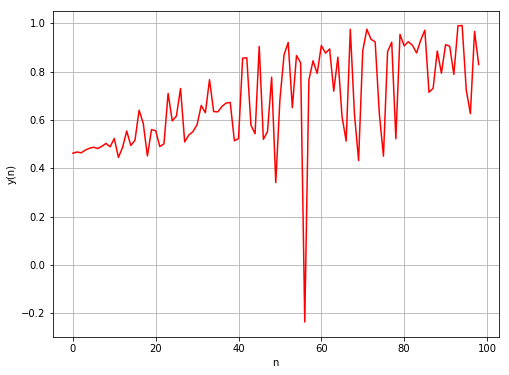

In [17]:
fig4 = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], y_perceptron_s[0:99], color='red')
plt.xlabel('n')
plt.ylabel('y(n)')

plt.grid()
plt.show()